<div style="background-color:#0f77ae; color:#ffffff; border: 1px solid #0f77ae; padding:5px; border-radius:5px;">
   <font color='#ffffff' size=6 face='Verdana'>Activity 2: HRP
</font>
</div>

<font color='#76cee4' size=3 face='Tahoma'></font>

<font color='#76cee4' size=3 face='Tahoma'>Paulina Gomez Heredia   |    Marian Sedano Paz</font>
***

<img style="float: left; margin: 30px 15px 15px 15px;" src="https://oci02.img.iteso.mx/Identidades-De-Instancia/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg" width="400" height="600" />
    
    
## <font color='navy'> PAP Optimización de Programas de Inversión
    
### <font color='navy'> Actividad: Hierarchical Risk Parity

Profesor: Sean Nicolás González Vázquez.

### **Objetivo**: Aplicar los conceptos de HRP vistos en clase, implementando el método para obtener los pesos de una cartera de inversión.

>  **<font color='navy'>  Implementación de HRP Manual** (80 puntos)

Aplicar los tres pasos del HRP:

+ Hierarchical Clustering Tree

+ Quasi-Diagonalization

+ HRP Algorithm

Y obtener las ponderaciones eficientes utilizando el algoritmo para el portafolio de inversión dado.

A continuación se desglosa lo que se espera que se entrege en cada punto:

+ **Hierarchical Clustering Tree**

En este punto, se espera que se entregue el mapa de calor con las correlaciones de la cartera planteada, además, se aplicará clustering jerárquico sobre los rendimientos de esta, para encontrar el dendograma.

+ **Quasi-Diagonalization**

Con el Árbol Jerárquico obtenido en la parte anterior, se espera, haciendo uso de las hojas obtenidas, que se ordenen los rendimientos para obtener la matriz de correlación seriada matricialmente o quasi-diagonalizada. Graficar el mapa de calor de esta.

+ **HRP Algorithm**

Con los dos puntos anteriores y las formúlas vistas en clase, se espera que se complete la clase `HierarchicalRiskParity` dada en la siguiente sección, esta clase, recibirá solamente los rendimientos del portafolio sin quasi-diagonalizar (sin tener el orden de la parte anterior) y la lista con el orden de las hojas dadas por el clustering jerárquico. A posteriori, se completarán los métodos de la clase para que al aplicar el método `HRP` de la clase generada sobre un portafolio de acciones, se obtengan las ponderaciones eficientes.

Después de obtener los pesos, se deberán de graficar en una gráfica de barras, se deben de observar los tickers en el eje x.


**Ojo:** A continuación se muestra una estructura del código que debes utilizar, el método de HRP debe de ser implementado en clases de manera obligatoria. Tarea sin interpretación de resultados no la calificaré.

***
## <font color='#76cee4' size=5 face='Verdana'>Implementación de HRP Manual</font>


In [1]:
import numpy as np
import pandas as pd

import yfinance as yf
import scipy.spatial.distance as ssd
import scipy.cluster.hierarchy as sch

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list

In [2]:
# Lista de tickers
tickers = ['IEF','BND','LQD','TIP','XLU','TLT','XLB','DIA','EWJ','SPY','XLK','XLE','EWQ','XLF']

# Descargar precios
data = yf.download(tickers=tickers,
                   period='1mo',
                   interval='1d')


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  14 of 14 completed


In [3]:
df = data['Close']
df = df.reset_index()

del df['Date']

In [4]:
df.head()

Ticker,BND,DIA,EWJ,EWQ,IEF,LQD,SPY,TIP,TLT,XLB,XLE,XLF,XLK,XLU
0,71.776070,441.279999,67.250000,38.310001,92.225586,106.672447,606.440002,107.139999,87.198891,88.739998,91.779999,50.410000,241.389999,78.320000
1,71.666428,445.380005,67.820000,38.759998,91.986351,106.522995,609.750000,107.239998,86.521309,89.230003,92.199997,50.700001,241.820007,78.690002
2,71.805977,444.119995,68.480003,39.119999,92.175751,106.732231,607.969971,107.430000,86.909920,89.000000,91.309998,50.849998,239.300003,79.489998
3,72.184738,447.119995,67.739998,39.150002,92.773842,107.469551,599.369995,107.879997,87.936256,89.050003,90.360001,51.410000,227.570007,77.650002
4,72.144867,448.410004,68.309998,38.750000,92.783813,107.320091,604.520020,107.949997,87.876472,88.760002,89.500000,51.320000,233.639999,76.580002


In [5]:
df.shape

(22, 14)

In [6]:
# rendimientos
  # creamos df de solo rendimientos
rend = pd.DataFrame()

for ticker in tickers:
    '''# tipo pct
    rend[f"r_pct_{ticker}"] = df[ticker].pct_change()'''
    # tipo log
    rend[f"r_log_{ticker}"] = np.log(df[ticker]) - np.log(df[ticker].shift(1))


In [7]:
rend = rend.reset_index()
del rend['index']
rend = rend.dropna()
rend

,r_log_IEF,r_log_BND,r_log_LQD,r_log_TIP,r_log_XLU,r_log_TLT,r_log_XLB,r_log_DIA,r_log_EWJ,r_log_SPY,r_log_XLK,r_log_XLE,r_log_EWQ,r_log_XLF
1,-0.002597,-0.001529,-0.001402,0.000933,0.004713,-0.007801,0.005507,0.009248,0.008440,0.005443,0.001780,0.004566,0.011678,0.005736
2,0.002057,0.001945,0.001962,0.001770,0.010115,0.004481,-0.002581,-0.002833,0.009685,-0.002924,-0.010476,-0.009700,0.009245,0.002954
3,0.006468,0.005261,0.006884,0.004180,-0.023420,0.011740,0.000562,0.006732,-0.010865,-0.014246,-0.050260,-0.010459,0.000767,0.010953
4,0.000107,-0.000553,-0.001392,0.000649,-0.013876,-0.000680,-0.003262,0.002881,0.008379,0.008556,0.026324,-0.009563,-0.010270,-0.001752
5,-0.001182,-0.000553,-0.001301,-0.001205,0.002087,-0.002043,-0.001804,-0.002747,-0.003079,-0.004493,-0.008165,0.002232,-0.003361,-0.000780
6,0.002149,0.001381,0.002229,0.001020,0.020635,0.003742,0.009436,0.003661,0.014867,0.005353,0.001854,0.005115,0.007995,0.009510
7,-0.001611,-0.001381,-0.003252,0.000741,-0.005889,-0.006587,-0.007294,-0.007672,-0.011788,-0.005336,-0.005875,-0.028348,-0.007736,-0.005812
8,0.000712,0.000901,0.001577,0.002312,0.005378,0.008109,0.001013,-0.002518,-0.009561,-0.006752,-0.013566,0.006256,-0.017760,-0.004088
9,0.002476,0.001385,0.001956,0.001661,-0.008851,0.003058,0.002921,0.002832,0.008975,0.006686,0.014302,0.020760,0.017242,-0.002344
10,0.005788,0.005107,0.006956,0.004417,0.010000,0.016375,-0.000786,0.007023,0.012374,0.004046,0.013802,0.002108,0.001294,0.010504


In [8]:
rend.shape

(21, 14)

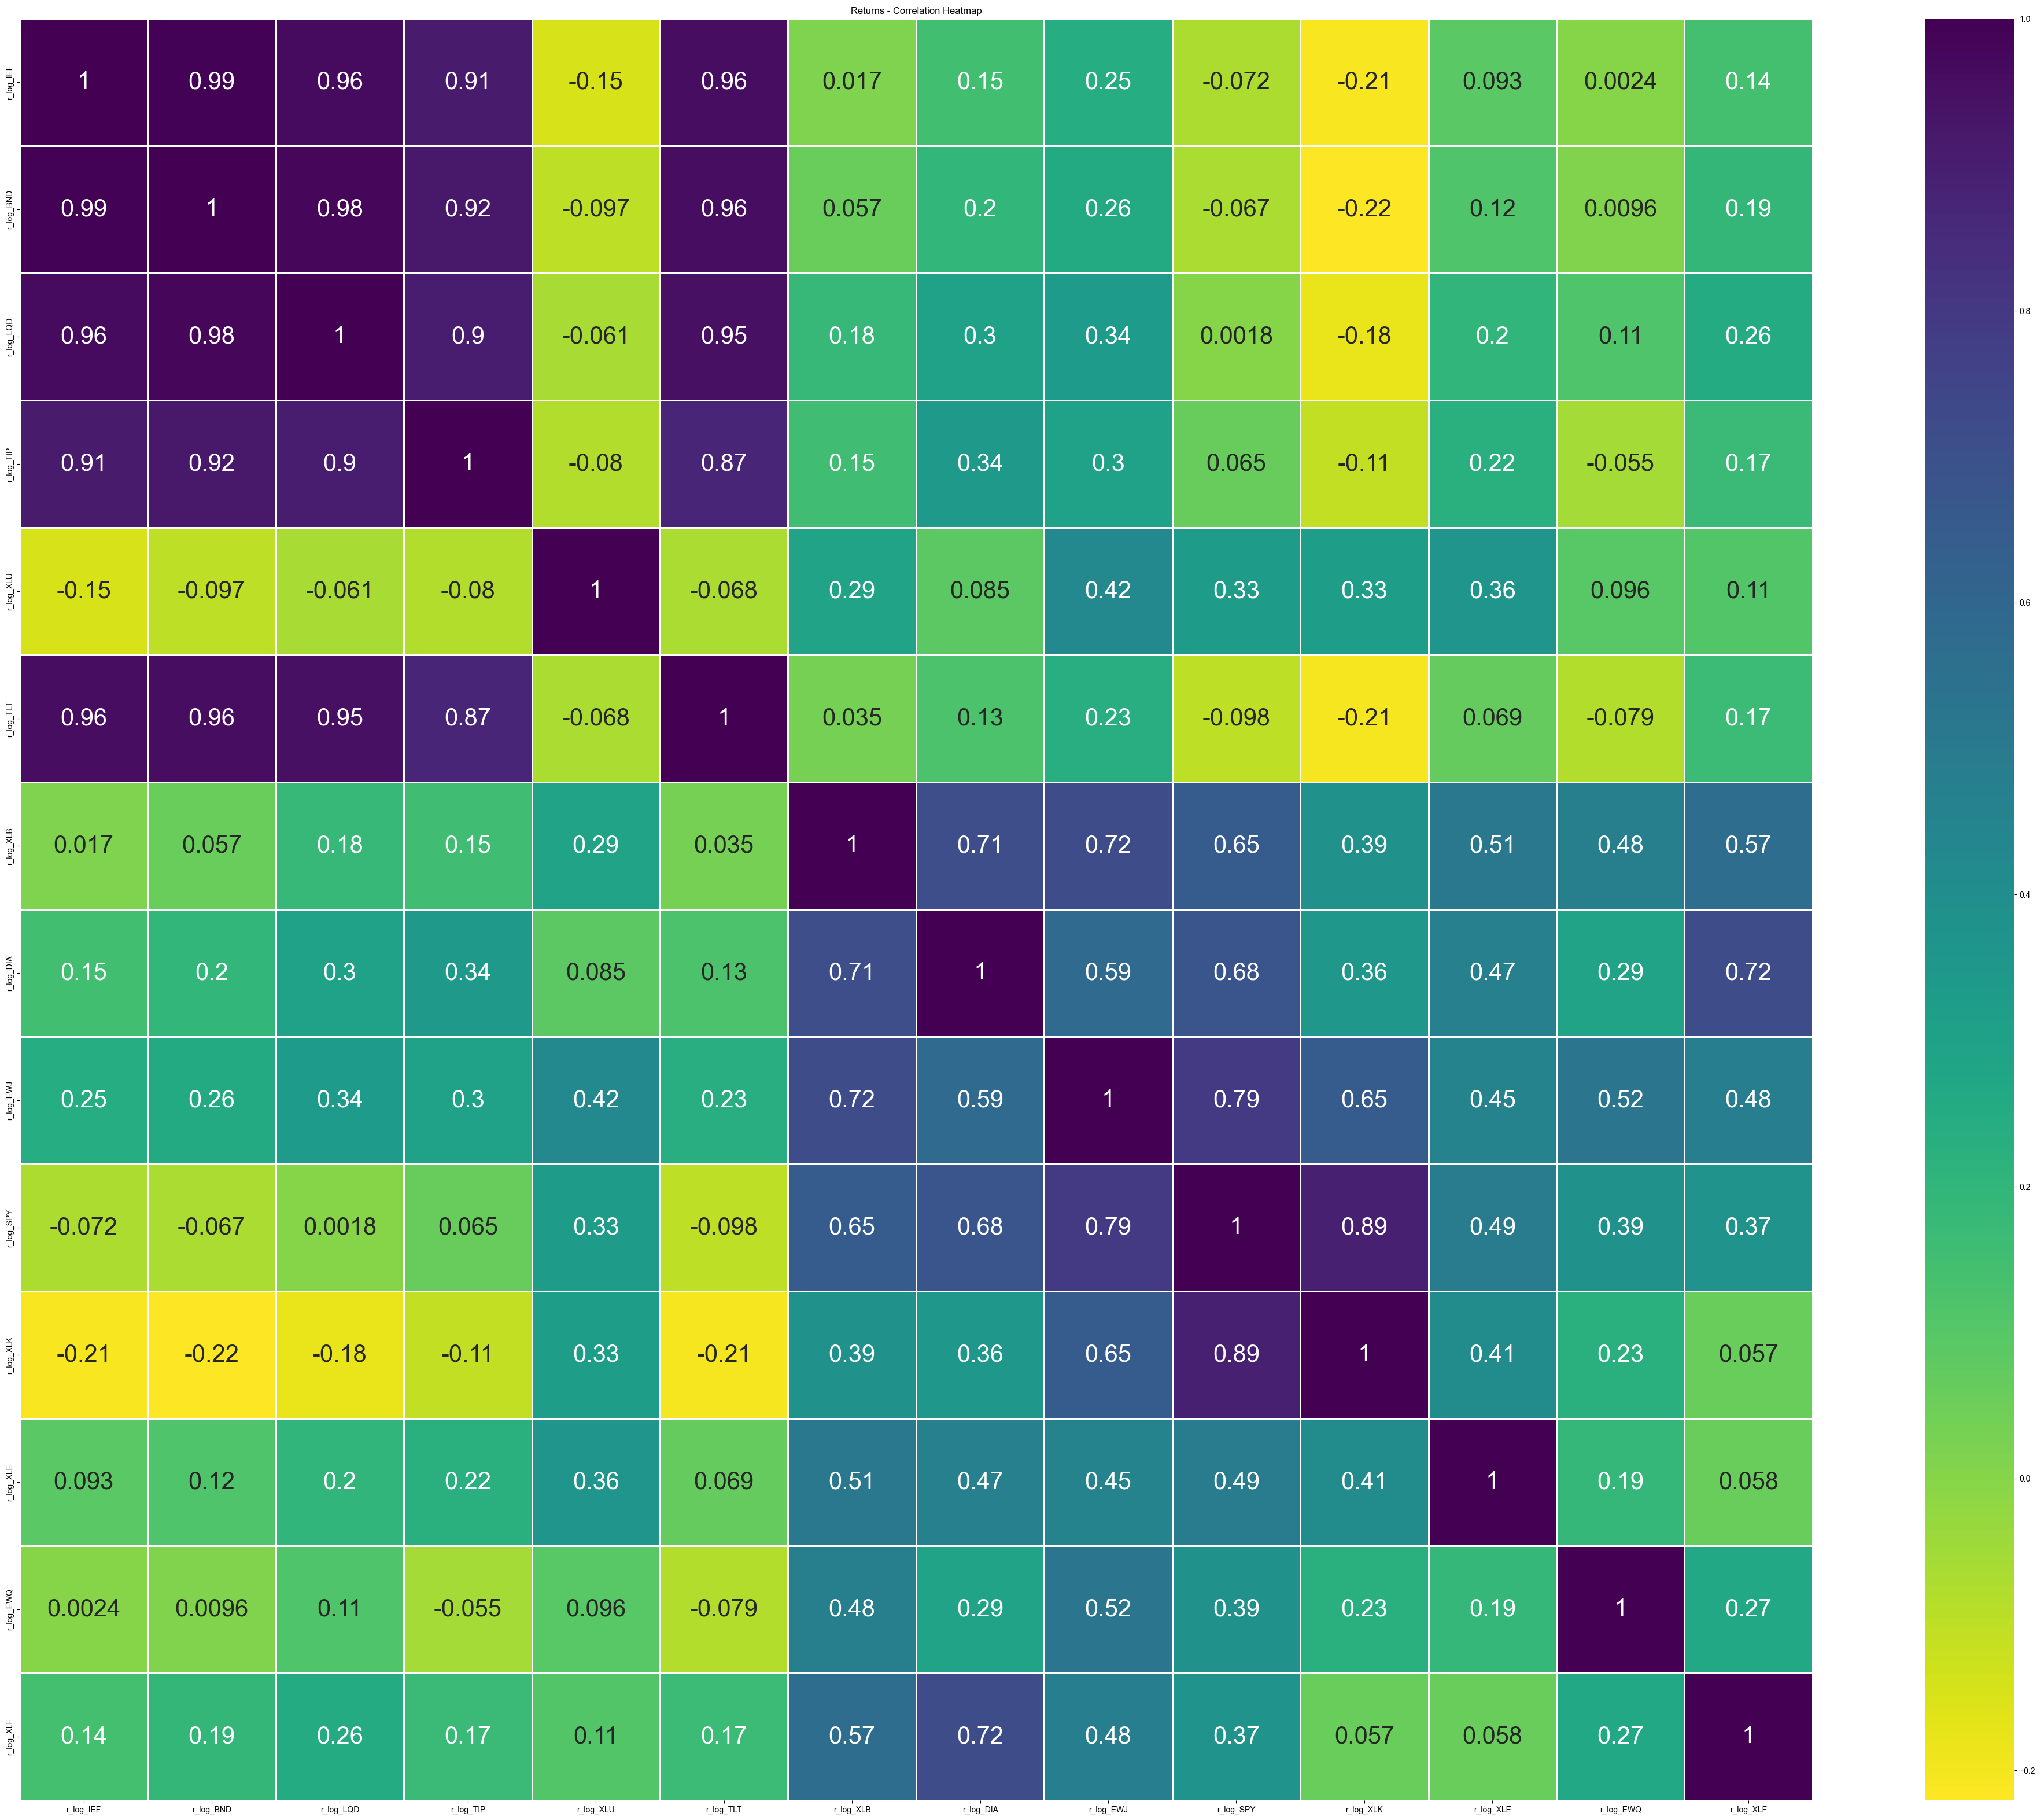

In [9]:
# mapa de calor de matriz correlacion (RENDIMIENTOS)
plt.figure(figsize=(50, 40))
plt.title('Returns - Correlation Heatmap')
sns.heatmap(rend.corr(numeric_only=True), annot=True, cmap='viridis_r', linecolor='white', linewidths=0.8, annot_kws={'fontsize':30})
sns.set(font_scale=2)
plt.show()

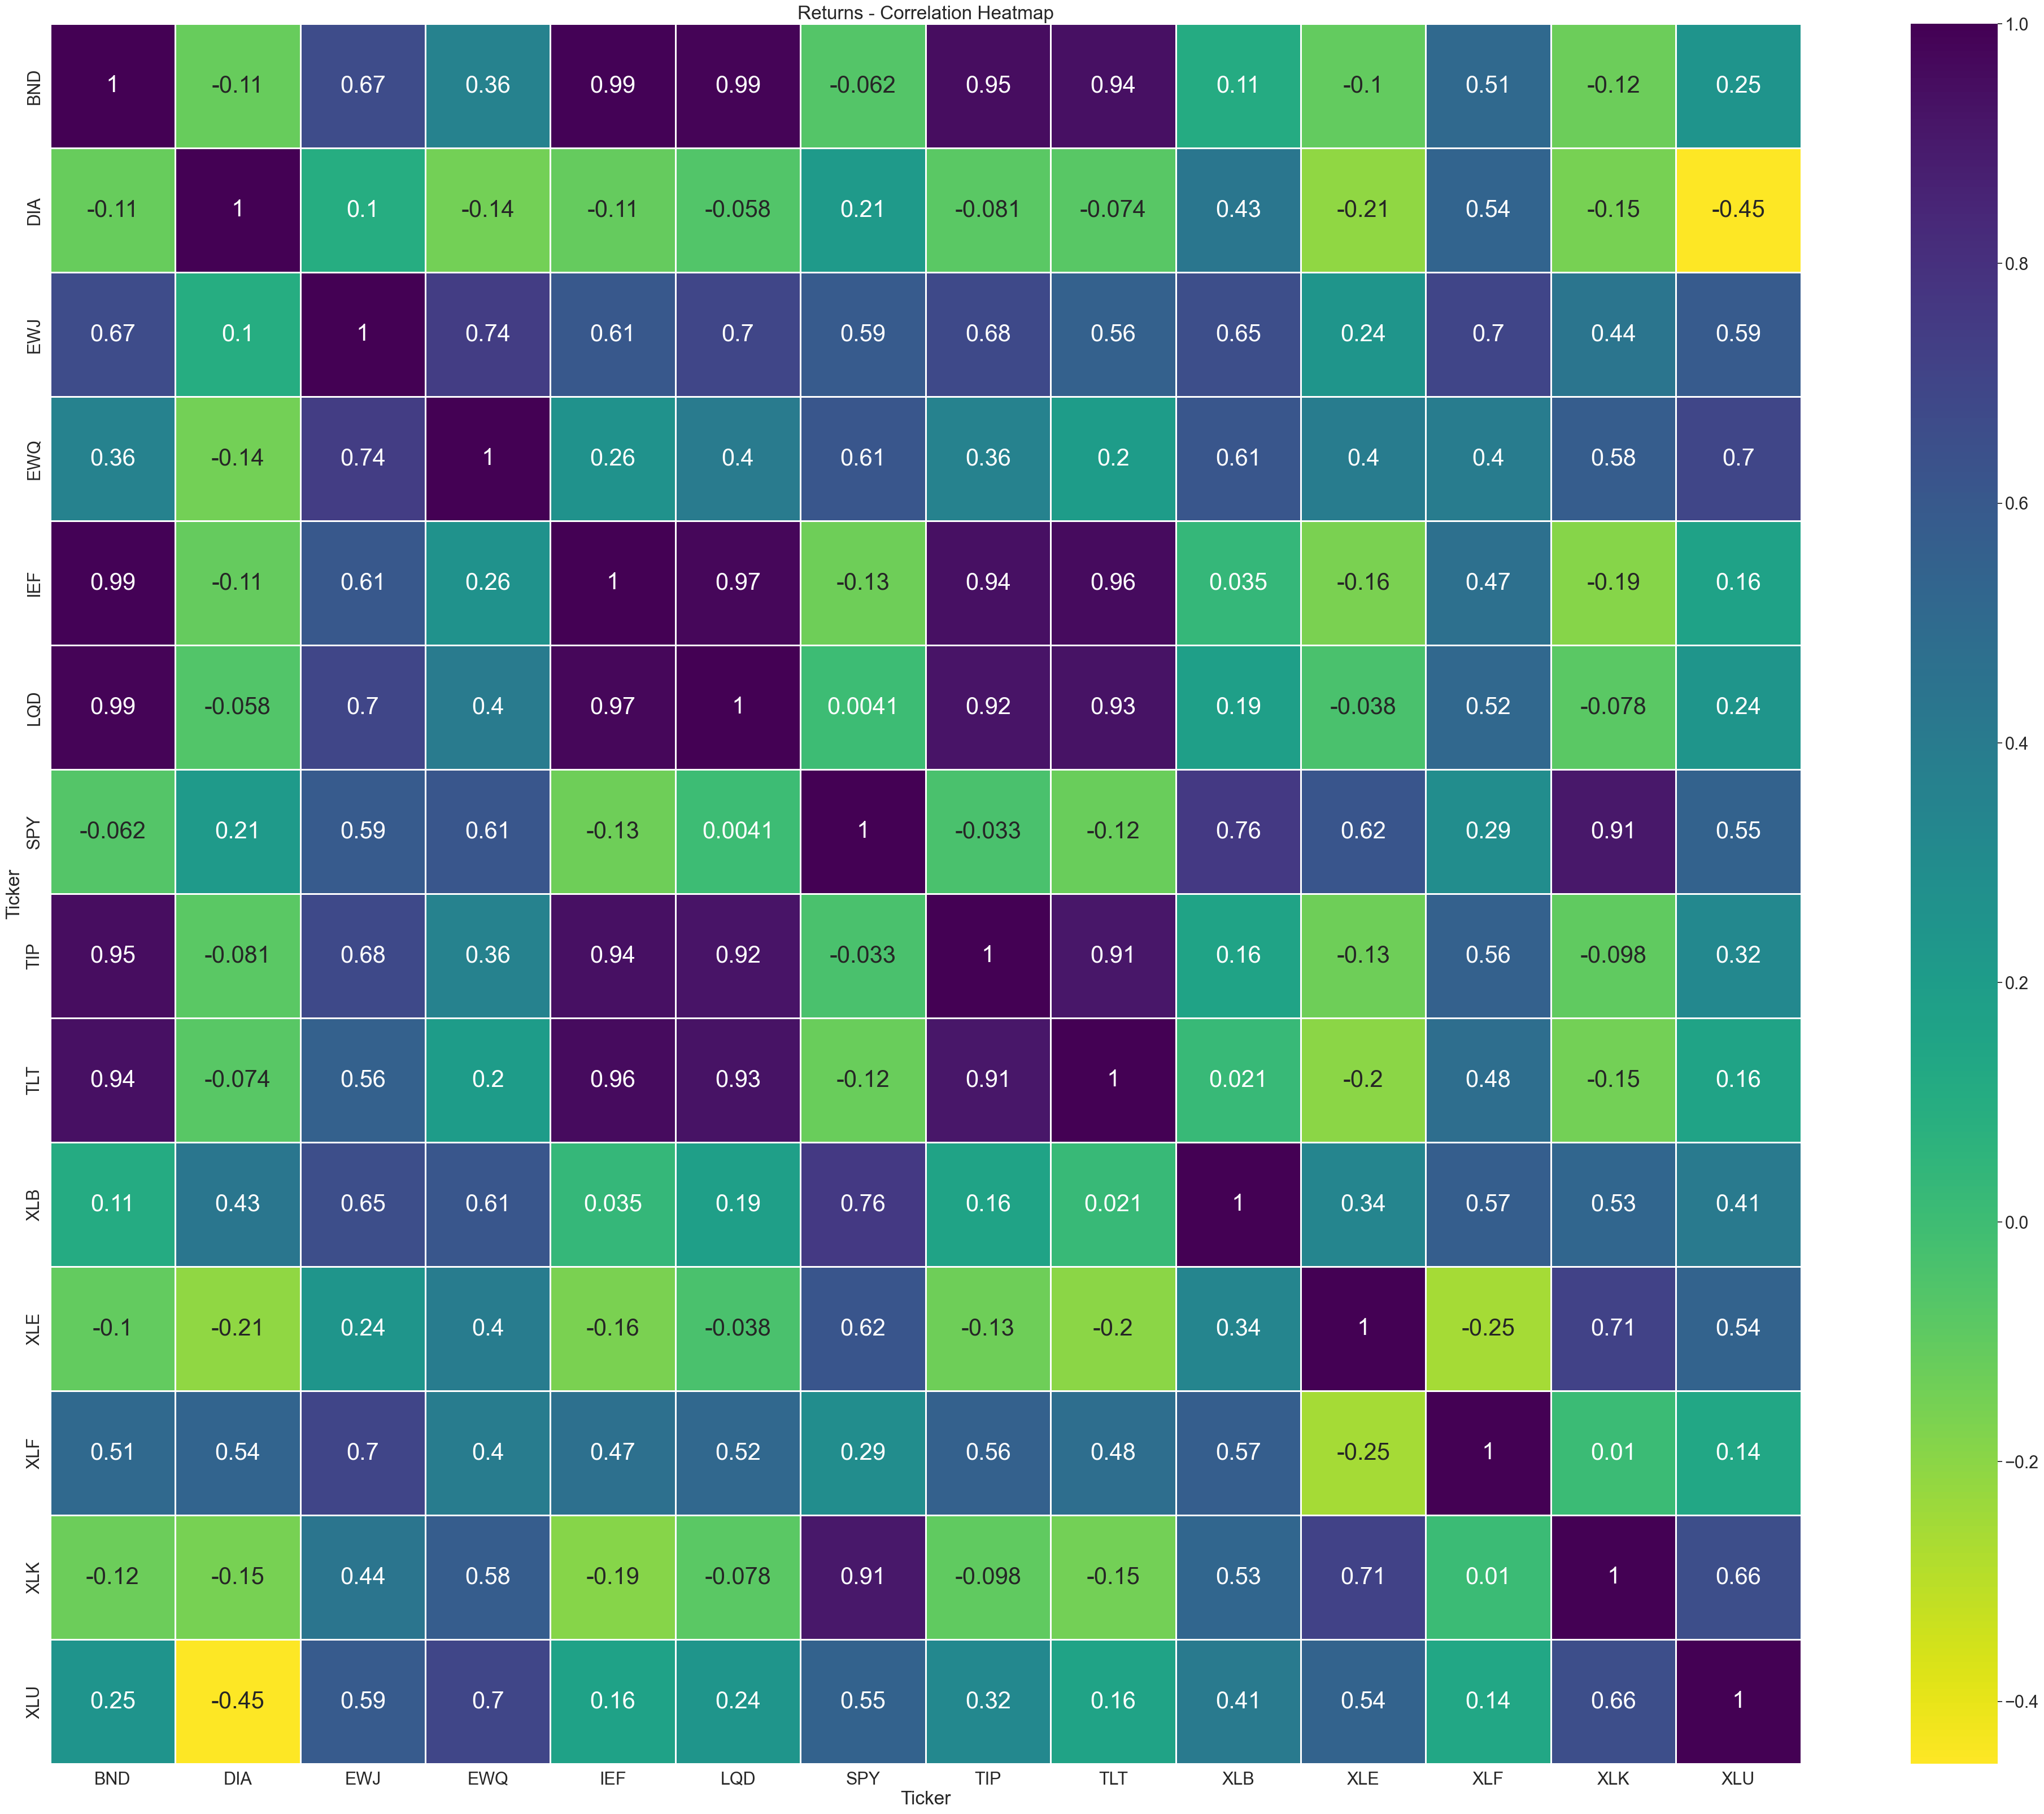

In [10]:
# mapa de calor de matriz correlacion (ASSETS)
plt.figure(figsize=(50, 40))
plt.title('Returns - Correlation Heatmap')
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis_r', linecolor='white', linewidths=0.8, annot_kws={'fontsize':30})
sns.set(font_scale=2)
plt.show()

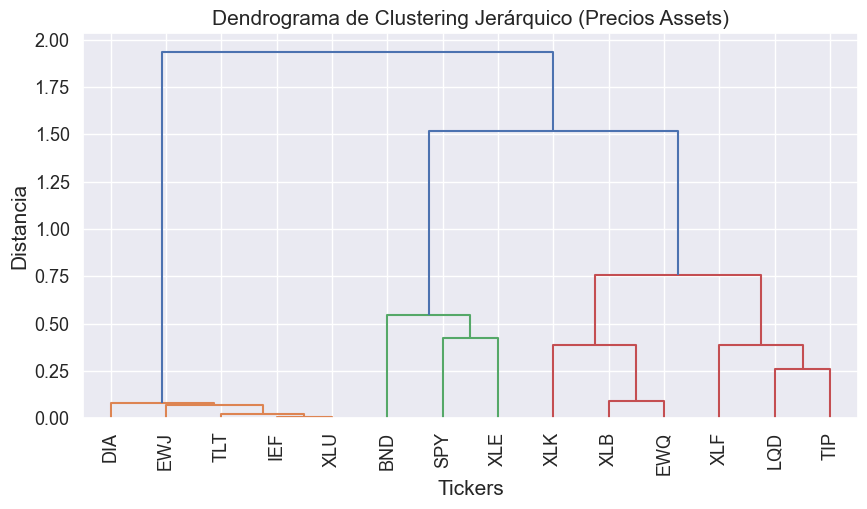

In [11]:
# aplicar clustering jerarquico, dibujar dendograma

correlation_matrix_assets = df.corr()

# correlaciones a distancias (1 - correlación)
distance_matrix_assets = 1 - correlation_matrix_assets

# convertir a vector compatible con linkage
condensed_distance_assets = ssd.squareform(distance_matrix_assets)

# Aplicar clustering jerárquico con 'ward'
linkage_matrix_assets = sch.linkage(condensed_distance_assets, method="ward")

# Graficar el dendrograma
plt.figure(figsize=(10, 5))
sch.dendrogram(linkage_matrix_assets, labels=tickers, leaf_rotation=90)
plt.title("Dendrograma de Clustering Jerárquico (Precios Assets)", fontsize=15)
plt.tick_params(axis='both', labelsize=13)
plt.xlabel("Tickers", fontsize=15)
plt.ylabel("Distancia", fontsize=15)
plt.show()


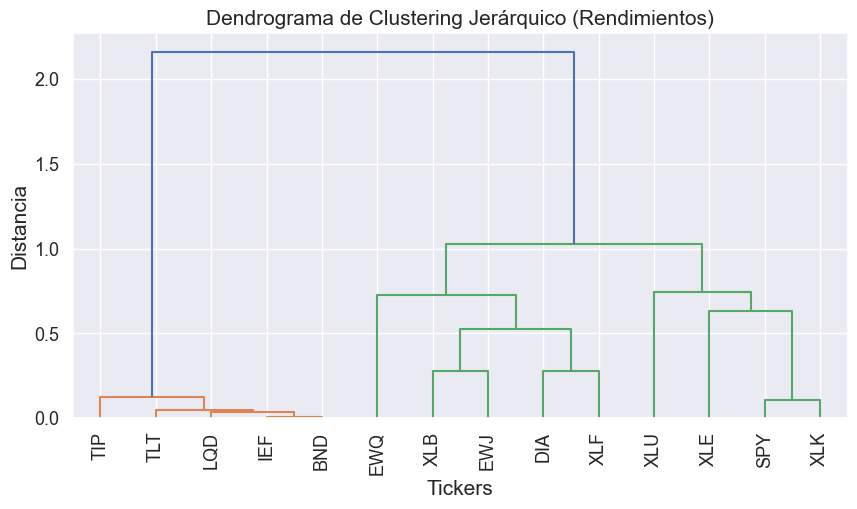

In [12]:
# aplicar clustering jerarquico, dibujar dendograma

correlation_matrix_rend = rend.corr()

# correlaciones a distancias (1 - correlación)
distance_matrix_rend = 1 - correlation_matrix_rend

# convertir a vector compatible con linkage
condensed_distance_rend = ssd.squareform(distance_matrix_rend)

# Aplicar clustering jerárquico con 'ward'
linkage_matrix_rend = sch.linkage(condensed_distance_rend, method="ward")

# Graficar el dendrograma
plt.figure(figsize=(10, 5))
sch.dendrogram(linkage_matrix_rend, labels=tickers, leaf_rotation=90)
plt.title("Dendrograma de Clustering Jerárquico (Rendimientos)", fontsize=15)
plt.tick_params(axis='both', labelsize=13)
plt.xlabel("Tickers", fontsize=15)
plt.ylabel("Distancia", fontsize=15)
plt.show()

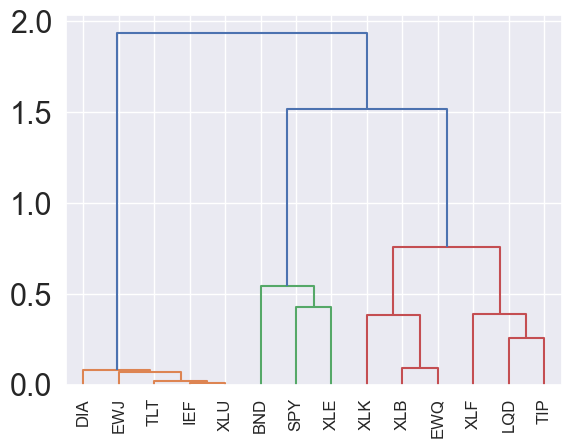

In [13]:
# obtener lista con orden de hojas del dendograma (RETURNS)
dendrogram_data_assets = sch.dendrogram(linkage_matrix_assets, labels=tickers, leaf_rotation=90)
ordered_tickers_assets = dendrogram_data_assets["ivl"]

In [14]:
ordered_tickers_assets

['DIA',
 'EWJ',
 'TLT',
 'IEF',
 'XLU',
 'BND',
 'SPY',
 'XLE',
 'XLK',
 'XLB',
 'EWQ',
 'XLF',
 'LQD',
 'TIP']

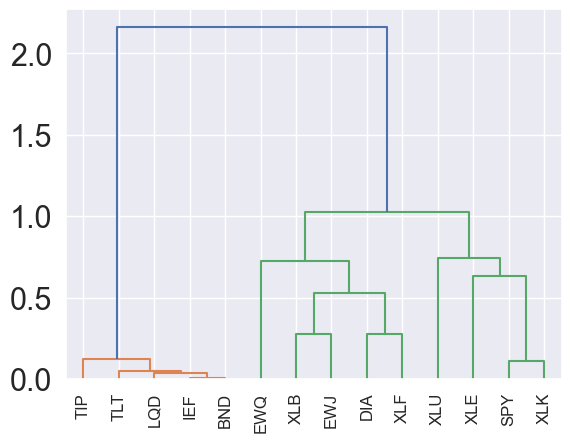

In [15]:
# obtener lista con orden de hojas del dendograma (RETURNS)
dendrogram_data_rend = sch.dendrogram(linkage_matrix_rend, labels=tickers, leaf_rotation=90)
ordered_tickers_rend = dendrogram_data_rend["ivl"]


In [16]:
ordered_tickers_rend

['TIP',
 'TLT',
 'LQD',
 'IEF',
 'BND',
 'EWQ',
 'XLB',
 'EWJ',
 'DIA',
 'XLF',
 'XLU',
 'XLE',
 'SPY',
 'XLK']

In [17]:
rend_ordenados = ['r_log_TIP',
 'r_log_TLT',
 'r_log_LQD',
 'r_log_IEF',
 'r_log_BND',
 'r_log_EWQ',
 'r_log_XLB',
 'r_log_EWJ',
 'r_log_DIA',
 'r_log_XLF',
 'r_log_XLU',
 'r_log_XLE',
 'r_log_SPY',
 'r_log_XLK']

In [18]:
rend = rend [rend_ordenados]

In [19]:
rend

,r_log_TIP,r_log_TLT,r_log_LQD,r_log_IEF,r_log_BND,r_log_EWQ,r_log_XLB,r_log_EWJ,r_log_DIA,r_log_XLF,r_log_XLU,r_log_XLE,r_log_SPY,r_log_XLK
1,0.000933,-0.007801,-0.001402,-0.002597,-0.001529,0.011678,0.005507,0.008440,0.009248,0.005736,0.004713,0.004566,0.005443,0.001780
2,0.001770,0.004481,0.001962,0.002057,0.001945,0.009245,-0.002581,0.009685,-0.002833,0.002954,0.010115,-0.009700,-0.002924,-0.010476
3,0.004180,0.011740,0.006884,0.006468,0.005261,0.000767,0.000562,-0.010865,0.006732,0.010953,-0.023420,-0.010459,-0.014246,-0.050260
4,0.000649,-0.000680,-0.001392,0.000107,-0.000553,-0.010270,-0.003262,0.008379,0.002881,-0.001752,-0.013876,-0.009563,0.008556,0.026324
5,-0.001205,-0.002043,-0.001301,-0.001182,-0.000553,-0.003361,-0.001804,-0.003079,-0.002747,-0.000780,0.002087,0.002232,-0.004493,-0.008165
6,0.001020,0.003742,0.002229,0.002149,0.001381,0.007995,0.009436,0.014867,0.003661,0.009510,0.020635,0.005115,0.005353,0.001854
7,0.000741,-0.006587,-0.003252,-0.001611,-0.001381,-0.007736,-0.007294,-0.011788,-0.007672,-0.005812,-0.005889,-0.028348,-0.005336,-0.005875
8,0.002312,0.008109,0.001577,0.000712,0.000901,-0.017760,0.001013,-0.009561,-0.002518,-0.004088,0.005378,0.006256,-0.006752,-0.013566
9,0.001661,0.003058,0.001956,0.002476,0.001385,0.017242,0.002921,0.008975,0.002832,-0.002344,-0.008851,0.020760,0.006686,0.014302
10,0.004417,0.016375,0.006956,0.005788,0.005107,0.001294,-0.000786,0.012374,0.007023,0.010504,0.010000,0.002108,0.004046,0.013802


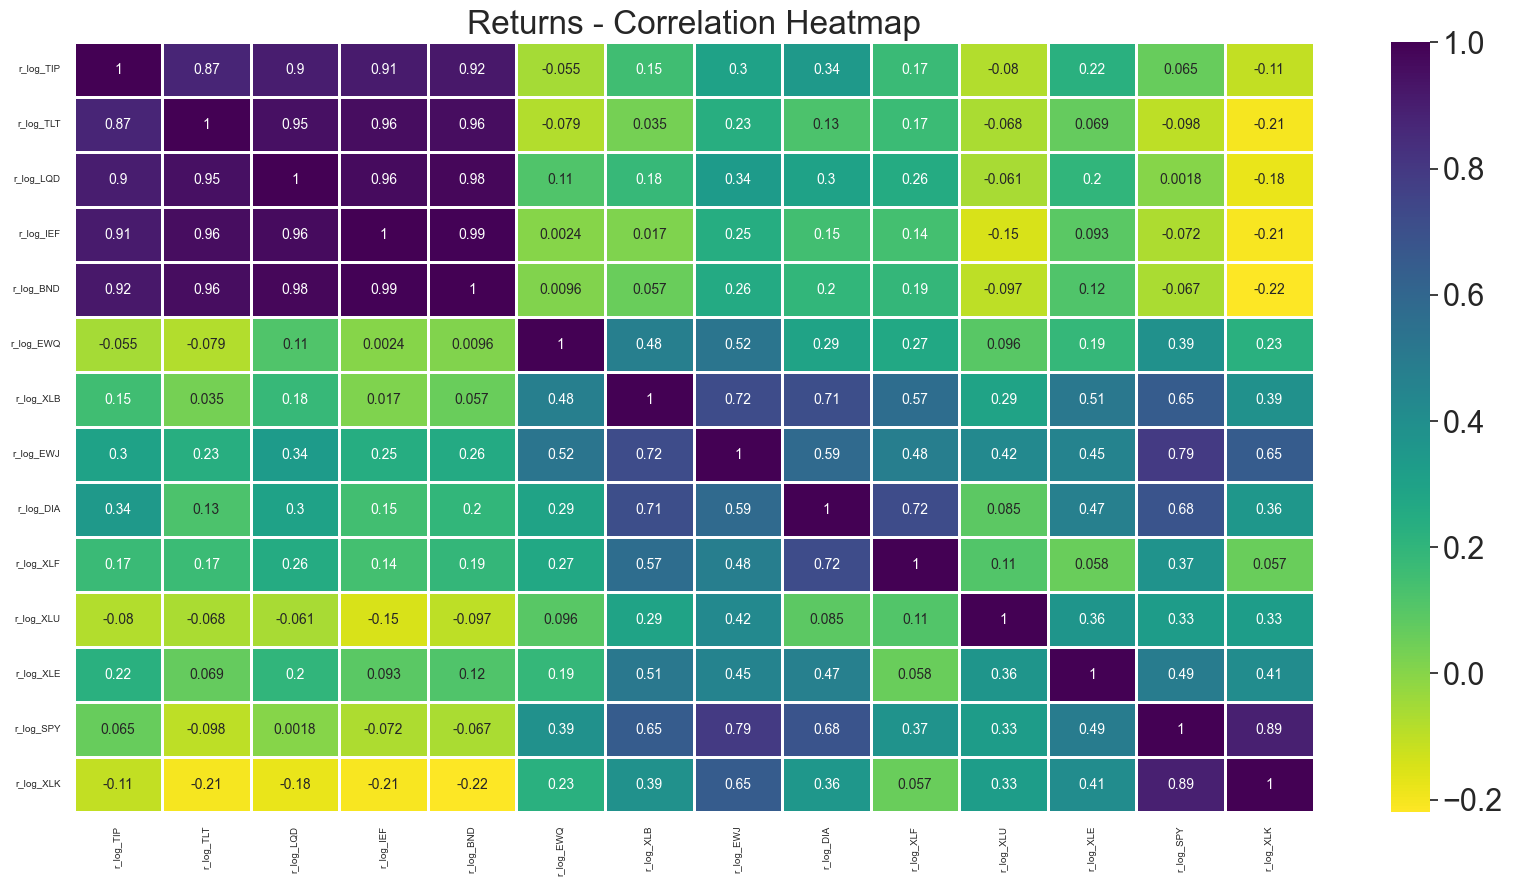

In [20]:
# quasi-diagonalización de rend, plotear mapa de calor de correlaciones
plt.figure(figsize=(20, 10))
plt.title('Returns - Correlation Heatmap')
sns.heatmap(rend.corr(numeric_only=True), annot=True, cmap='viridis_r', linecolor='white', linewidths=0.8, annot_kws={'fontsize':10})
sns.set(font_scale=2)
plt.tick_params(axis='both', labelsize=7)
plt.show()


In [21]:
# Aplicacion de Algoritmo HRP
class HierarchicalRiskParity:

    def __init__(self, rends, quasi_index):

        self.names=rends.columns
        self.cov=rends.cov()
        self.names=rends.loc[:, quasi_index].columns
        self.indexes=quasi_index

    # metodo para obtener la variación de los clusters
    def cluster_variation(self, items):
        # Obtener Matriz de correlaciones actual
        cov_matrix = self.cov.loc[items, items]

        # Obtener primero pesos temporales del cluster con funcion de cov inversa
        inv_diag = 1 / np.diag(cov_matrix)
        w_temp = inv_diag / np.sum(inv_diag)

        # Obtener varianza temporal del cluster
        var = w_temp.T @ cov_matrix @ w_temp

        return var



    @staticmethod # biseccion recursiva
    def bisection(items):
        new_items = [i[int(j):int(k)] for i in items for j, k in
                     ((0, len(i) / 2), (len(i) / 2, len(i))) if len(i) > 1]
        return new_items



    # funcion para la obtencion de pesos por HRP
    def HRP(self):

        # Inicializar pesos
        weights = pd.Series(1,index=self.names)

        # Inicializar clusters con indices dados por cluster
        clusters = [self.indexes]

        # Mientras sigamos teniendo clusters...
        while len(clusters)>0:
            # Aplicamos biseccion recursiva
            clusters = self.bisection(clusters)

            # Para cada cluster de la biseccion recursiva spliteando en dos:
            for i in range(0, len(clusters), 2):
                if i + 1 >= len(clusters):
                  continue

                # Obtener indice i e i+1 de clusters
                cluster_0 , cluster_1 = clusters[i] , clusters[i+1]

                # Calcular varianza de i e i+1 cluster, utilizar cluster_variation
                var_0 = self.cluster_variation(cluster_0)
                var_1 = self.cluster_variation(cluster_1)


                # Calcular alpha o factor de ajuste de los pesos
                #alpha = (1 - var_0) / (var_0 + var_1)
                alpha = 1 - var_0 / (var_0 + var_1)

                # Ajustar pesos con alpha
                weights[cluster_0] *= alpha
                weights[cluster_1] *= (1-alpha)

        return weights


In [22]:
# aplicar clase creada en nuestro portafolio
quasi_index = list(rend.columns)

hrp = HierarchicalRiskParity(rend,quasi_index)

p_weights = hrp.HRP()

C:\Users\Maria\AppData\Local\Temp\ipykernel_1736\4112313558.py:67: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.79841179 0.79841179 0.79841179 0.79841179 0.79841179 0.79841179
 0.79841179]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[cluster_0] *= alpha


In [23]:
p_weights

r_log_TIP    0.277619
r_log_TLT    0.015931
r_log_LQD    0.082325
r_log_IEF    0.134074
r_log_BND    0.223748
r_log_EWQ    0.027257
r_log_XLB    0.037459
r_log_EWJ    0.036221
r_log_DIA    0.041823
r_log_XLF    0.036571
r_log_XLU    0.028510
r_log_XLE    0.012995
r_log_SPY    0.037777
r_log_XLK    0.007691
dtype: float64

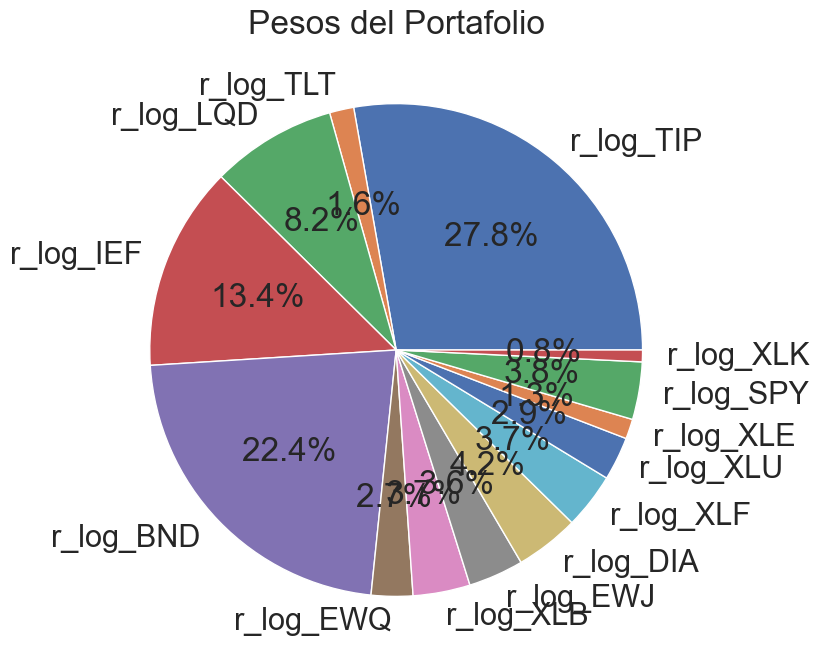

In [24]:
# graficar pesos
  # pie chart
plt.figure(figsize=(8,8))
plt.pie(p_weights, labels=p_weights.index, autopct='%1.1f%%')
plt.title('Pesos del Portafolio')
plt.show()

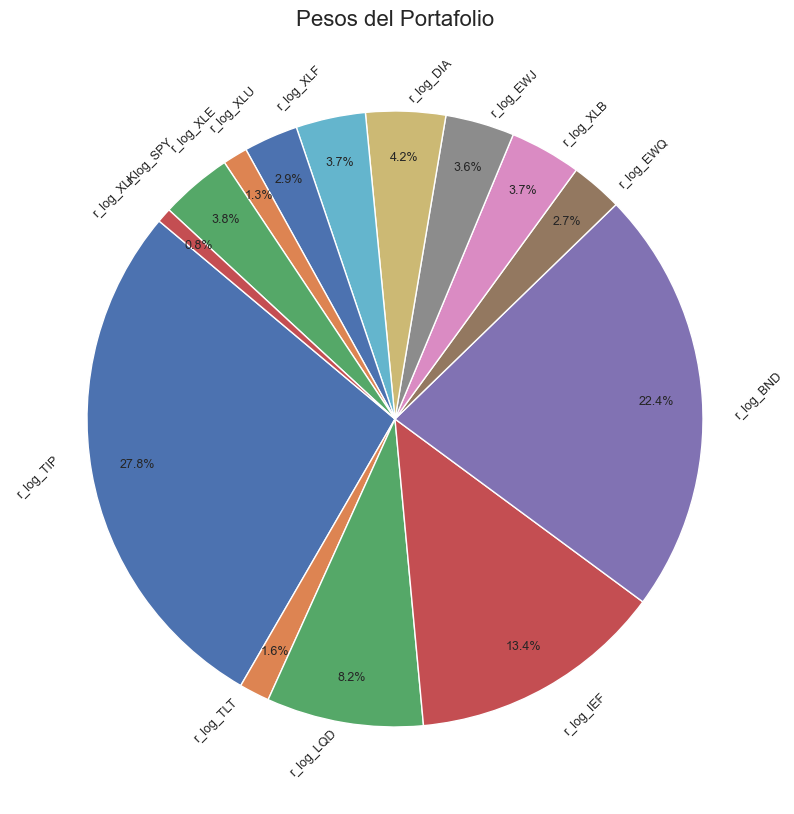

In [53]:
# graficar pesos
  # pie chart
plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(
    p_weights,
    labels=p_weights.index,
    autopct='%1.1f%%',
    startangle=140,
    labeldistance=1.1, 
    pctdistance=0.85, 
    textprops={'fontsize': 9}
)

for text in texts:
    text.set_rotation(45)

plt.title('Pesos del Portafolio', fontsize=16)
plt.show()

In [25]:
rend

,r_log_TIP,r_log_TLT,r_log_LQD,r_log_IEF,r_log_BND,r_log_EWQ,r_log_XLB,r_log_EWJ,r_log_DIA,r_log_XLF,r_log_XLU,r_log_XLE,r_log_SPY,r_log_XLK
1,0.000933,-0.007801,-0.001402,-0.002597,-0.001529,0.011678,0.005507,0.008440,0.009248,0.005736,0.004713,0.004566,0.005443,0.001780
2,0.001770,0.004481,0.001962,0.002057,0.001945,0.009245,-0.002581,0.009685,-0.002833,0.002954,0.010115,-0.009700,-0.002924,-0.010476
3,0.004180,0.011740,0.006884,0.006468,0.005261,0.000767,0.000562,-0.010865,0.006732,0.010953,-0.023420,-0.010459,-0.014246,-0.050260
4,0.000649,-0.000680,-0.001392,0.000107,-0.000553,-0.010270,-0.003262,0.008379,0.002881,-0.001752,-0.013876,-0.009563,0.008556,0.026324
5,-0.001205,-0.002043,-0.001301,-0.001182,-0.000553,-0.003361,-0.001804,-0.003079,-0.002747,-0.000780,0.002087,0.002232,-0.004493,-0.008165
6,0.001020,0.003742,0.002229,0.002149,0.001381,0.007995,0.009436,0.014867,0.003661,0.009510,0.020635,0.005115,0.005353,0.001854
7,0.000741,-0.006587,-0.003252,-0.001611,-0.001381,-0.007736,-0.007294,-0.011788,-0.007672,-0.005812,-0.005889,-0.028348,-0.005336,-0.005875
8,0.002312,0.008109,0.001577,0.000712,0.000901,-0.017760,0.001013,-0.009561,-0.002518,-0.004088,0.005378,0.006256,-0.006752,-0.013566
9,0.001661,0.003058,0.001956,0.002476,0.001385,0.017242,0.002921,0.008975,0.002832,-0.002344,-0.008851,0.020760,0.006686,0.014302
10,0.004417,0.016375,0.006956,0.005788,0.005107,0.001294,-0.000786,0.012374,0.007023,0.010504,0.010000,0.002108,0.004046,0.013802


> **<font color='navy'> Implementación de HRP con PyPortopt** (20 puntos)
    
Instalar la librería `PyPortfolioOpt` de Python, una librería que ayuda a optimizar cuantitativamente portafolios de inversión.
    
Esta librería se puede instalar de la siguiente manera:
    
`pip install PyPortfolioOpt`
    
    
Buscar en la documentación de la librería, el método `HRP_opt` que utiliza Hierarchical Risk Parity para obtener las ponderaciones eficientes de un portafolio de inversión.
    
Después de obtener las ponderaciones, graficarlas, notesé que los resultados obtenidos deben de dar lo mismo que los resultados obtenidos en la sección anterior, si no sucede esto, tu código es érroneo.

In [31]:
from pypfopt import HRPOpt

(CVXPY) Feb 21 06:50:19 PM: Encountered unexpected exception importing solver OSQP:
ImportError('DLL load failed while importing qdldl: The specified module could not be found.')


In [34]:
hrp2 = HRPOpt(rend,quasi_index)

hrp2 = hrp2.optimize()

In [35]:
hrp2

OrderedDict([('r_log_BND', np.float64(0.23411396248242466)),
             ('r_log_DIA', np.float64(0.03947967436901454)),
             ('r_log_EWJ', np.float64(0.019180906806756957)),
             ('r_log_EWQ', np.float64(0.0318456997960022)),
             ('r_log_IEF', np.float64(0.14028598175271895)),
             ('r_log_LQD', np.float64(0.08362906812256965)),
             ('r_log_SPY', np.float64(0.03589361155509493)),
             ('r_log_TIP', np.float64(0.2820173538697554)),
             ('r_log_TLT', np.float64(0.016183577256808166)),
             ('r_log_XLB', np.float64(0.02552286771028326)),
             ('r_log_XLE', np.float64(0.01566068145625154)),
             ('r_log_XLF', np.float64(0.03452160037226266)),
             ('r_log_XLK', np.float64(0.007307402432247531)),
             ('r_log_XLU', np.float64(0.03435761201780957))])

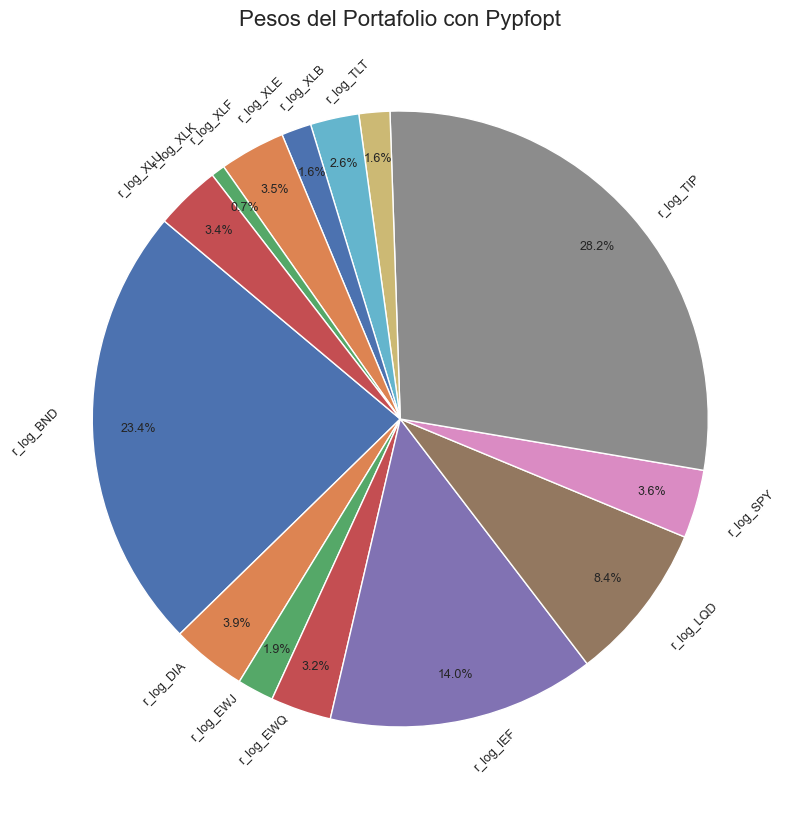

In [ ]:
# Extraer etiquetas y valores
labels = list(hrp2.keys())
values = list(hrp2.values())

# graficar pesos
  # pie chart
plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(
    values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    labeldistance=1.1, 
    pctdistance=0.85, 
    textprops={'fontsize': 9}
)

for text in texts:
    text.set_rotation(45)

plt.title('Pesos del Portafolio con Pypfopt', fontsize=16)
plt.show()